In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px

## 1. Tratamento e Limpeza de dados

##### Inicialmente, os dados estavam organizados por ano e apresentavam colunas extras em algumas linhas, o que exigiu a adição temporária de novas colunas ao arquivo para permitir a leitura correta dos dados. Após essa etapa, as colunas extras foram removidas. Também foi necessário eliminar linhas inconsistentes nos bancos de dados, como a primeira e a última de cada arquivo. Concluído esse tratamento, todos os arquivos foram concatenados em um único arquivo, visando simplificar as análises posteriores.

In [138]:
df24 = pd.read_csv('consultaDespesa_Prefeitura_Teixeira_2024.csv', sep=';')
df24 = df24.drop(df24.columns[[28, 29, 30, 31]], axis=1)
df24 = df24.drop([0, 8682], axis=0)

df23 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2023.csv', sep=';')
df23 = df23.drop(df23.columns[[28,29, 30, 31,32,33,34]], axis=1)
df23 = df23.drop([0, 9945], axis=0)

df22 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2022.csv', sep=';', )
df22 = df22.drop(df22.columns[[28,29, 30, 31]], axis=1)
df22 = df22.drop([0, 13102], axis=0)

df21 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2021.csv', sep=';')
df21 = df21.drop(df21.columns[[28,29, 30, 31]], axis=1)
df21 = df21.drop([0, 10744], axis=0)

df20 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2020.csv', sep=';')
df20 = df20.drop(df20.columns[[28,29, 30, 31]], axis=1)
df20 = df20.drop([0, 6378], axis=0)

df19 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2019.csv', sep=';')
df19 = df19.drop(df19.columns[[28,29, 30, 31]], axis=1)
df19 = df19.drop([0, 5719], axis=0)

df18= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2018.csv', sep=';', )
df18 = df18.drop(df18.columns[[28,29, 30, 31]], axis=1)
df18 = df18.drop([0, 5297], axis=0)

df17= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2017.csv', sep=';')
df17 = df17.drop(df17.columns[[28,29, 30, 31]], axis=1)
df17 = df17.drop([0, 6082], axis=0)

df16= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2016.csv', sep=';')
df16 = df16.drop(df16.columns[[28,29, 30, 31]], axis=1)
df16 = df16.drop([0, 8391], axis=0)

df15= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2015.csv', sep=';')
df15 = df15.drop(df15.columns[[28,29, 30, 31,32]], axis=1)
df15 = df15.drop([0, 6977], axis=0)

df14= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2014.csv', sep=';')
df14 = df14.drop(df14.columns[[28,29, 30, 31,32]], axis=1)
df14 = df14.drop([0, 5589], axis=0)

df = pd.concat([df24, df23, df22, df21, df20 ,df19 ,df18 ,df17 ,df16, df15,df14])

## Baguncei tudo kkk

So para ver algumas informações, vou deixar aqui as features que acho importante, vale salientar que temos grande parte como coluna categorica mas a boa noticia que tem um codigo para cada valor ou seja fique bem melhor de trabalhar, pois ja estão com um rotulo so tratar, e temos 15 mil dados de licitações o que é bom, deixarei as feature a seguir:

data
fonte recurso
unid. orc
função
subfunção,
programa
ação
Elemento, 
valor liquidado

algumas são obvias outras eu olhei a distribuição para saber se iam ser validas ou não, depois da uma analisada, as que tinha muito de um so tipo eu desconsiderei

In [139]:
df2 = df[df["Licitação"] == "SIM"]

In [140]:
df2

,Unnamed: 0,Número,Data,Nome,CPF/CNPJ,Licitação,Nº Licitação,Histórico,Fonte Recurso,Modalidade,...,Elemento,Valor Fixado,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Anulado,Valor Saldo,Data de Pagamento,Data de Liquidação,Data de Liquidação
50,DL,187,12/01/2024,ONI TELECOM SERVICOS E COMERCIO LTDA,***.660.000-**,SIM,000092022,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,15001000 - Recursos Livres (Ordinário),0 - Ordinário,...,40 - Serviços De Tecnologia Da Informação E Co...,"5.000,00","750,00","750,00","750,00",NaN,"0,00",22/01/2024,12/01/2024,NaN
51,DL,191,12/01/2024,MIRELLY SANTOS LEITE,***.449.477-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
52,DL,192,12/01/2024,VALDEMIR LAURENTINO DA SILVA,***.863.405-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
53,DL,193,12/01/2024,RUBENI NUNES DE SOUZA,***.912.484-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
54,DL,194,12/01/2024,LYSANDRA DA SILVA MARTINS,***.931.408-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,DL,4733,21/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","15.126,25","15.126,25","0,00",NaN,"15.126,25",NaN,21/11/2014,NaN
5584,DL,4781,28/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","6.528,75","6.528,75","0,00",NaN,"6.528,75",NaN,28/11/2014,NaN
5586,DL,5266,24/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,0 - Ordinário,...,32 - Material de Distribuição Gratuita,"630,00","11.397,20","11.397,20","0,00",NaN,"11.397,20",NaN,24/12/2014,NaN
5587,DL,5269,26/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","7.022,32","7.022,32","0,00",NaN,"7.022,32",NaN,26/12/2014,NaN


In [141]:
df2.iloc[1,:]

Unnamed: 0                                                            DL
 Número                                                              191
Data                                                          12/01/2024
Nome                                                MIRELLY SANTOS LEITE
CPF/CNPJ                                                  ***.449.477-**
Licitação                                                            SIM
Nº Licitação                                                   000092023
Histórico              VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...
Fonte Recurso          16600000 - Transferência de Recursos do Fundo ...
Modalidade                                                 0 - Ordinário
Órgão                               2 - Prefeitura Municipal de Teixeira
Unid. Orc               2120 - Fundo Municipal de Ação e Promoção Social
Função                                            8 - Assistência Social
Subfunção                                  244 - As

In [142]:
#boa provavelmente
print(df2["Elemento"].value_counts())

Elemento
30 - Material de Consumo                                                                  5118
39 - Outros Serviços de Terceiros - Pessoa Jurídica                                       3307
36 - Outros Serviços de Terceiros - Pessoa Física                                         2657
30 - Material De Consumo                                                                   962
36 - Outros Serviços De Terceiros - Pessoa Física                                          798
39 - Outros Serviços De Terceiros - Pessoa Jurídica                                        760
32 - Material de Distribuição Gratuita                                                     508
35 - Serviços de Consultoria                                                               208
52 - Equipamentos e Material Permanente                                                    172
51 - Obras e Instalações                                                                   169
90 - Aplicações Diretas                  

In [143]:
# não vejo boa correlaçao disso com anomalia
print(df2["Natureza"].value_counts())

Natureza
3 - OUTRAS DESPESAS CORRENTES                                                                                        11940
3 - Outras Despesas Correntes                                                                                         2648
4 - INVESTIMENTOS                                                                                                      341
4 - Investimentos                                                                                                       99
3 - Despesas Correntes                                                                                                  78
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS       29
3 - DESPESAS CORRENTES                                                                                                  23
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         11
4 - DES

In [144]:
# não vejo boa correlaçao disso com anomalia
print(df2["Modalidade"].value_counts())

Modalidade
0 - Ordinário                                                                                                                                                                                                            14678
2 - Global                                                                                                                                                                                                                 350
16320000 - Transferências do Estado referentes a Convênios e Instrumentos Congêneres vinculados à Saúde                                                                                                                     51
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde                                                                     32
 E, QUE SERÃO PAGOS COM RECURSO PROVENIENTE DO BLOCO PARA A MANUTENÇÃO DAS AÇÕES E SERVIÇOS PÚBLI

In [145]:
#coluna com provavel boa correlação com questão de anomalia

print(df2["Fonte Recurso"].value_counts())

Fonte Recurso
15001000 - Recursos Livres (Ordinário)                                                                                                                       1901
0 - Recursos Ordinários                                                                                                                                      1038
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde       904
1001 - Recursos Ordinários                                                                                                                                    839
15001002 - Recursos não Vinculados de Impostos - Saúde                                                                                                        737
                                                                                                                                                             ... 
 PROCESSO ADMI

In [146]:
# nao compensa essa coluna
print(df2["Categoria Econômica"].value_counts())

Categoria Econômica
3 - DESPESAS CORRENTES                                                                                               11940
3 - Despesas Correntes                                                                                                2648
4 - DESPESAS DE CAPITAL                                                                                                342
4 - Despesas De Capital                                                                                                 99
1003 - Implementar novo modelo de gestão na Saúde                                                                       47
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         39
2015 - Manutenção da Unidade Mista Sancho Leite-RECURSOS PRÓPRIOS                                                       28
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS      

In [147]:
df2 = df2.drop([
    "Unnamed: 0",
    " Número",
    "Nome",
    "CPF/CNPJ",
    "Licitação",
    "Nº Licitação",
    "Histórico",
    "Órgão",
    "Categoria Econômica",
    "Natureza",
    "Aplicação",
    "Valor Fixado",
    "Valor Liquidado",
    "Valor Pago",
    "Valor Anulado",
    " Valor Saldo",
    "Data de Pagamento",
    " Data de Liquidação",
    "Data de Liquidação",
    "Modalidade"
], axis = 1)

In [148]:
df2['Valor Empenhado'] = (
    df2['Valor Empenhado']
    .str.replace('.', '', regex=False)   # Remove separadores de milhar
    .str.replace(',', '.', regex=False) 
    .pipe(pd.to_numeric, errors='coerce') # Converte para float, ignorando erros
)

In [149]:
df2

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
50,12/01/2024,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00
51,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
52,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
53,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
54,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
...,...,...,...,...,...,...,...,...,...
5583,21/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25
5584,28/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75
5586,24/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20
5587,26/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32


In [150]:
df2.dtypes

Data                object
Fonte Recurso       object
Unid. Orc           object
Função              object
Subfunção           object
Programa            object
Ação                object
Elemento            object
Valor Empenhado    float64
dtype: object

In [151]:
df2.describe()

,Valor Empenhado
count,15134.000000
mean,8479.552755
std,26000.675153
min,0.000000
25%,1300.000000
50%,2490.045000
75%,6208.352500
max,635784.590000


#### Poucas linhas nulas, menos que 1%, então resolvi so tirar

In [152]:
df2.isnull().sum()

Data                0
Fonte Recurso      29
Unid. Orc          35
Função             35
Subfunção          35
Programa           35
Ação               35
Elemento           35
Valor Empenhado    85
dtype: int64

In [153]:
df2 = df2.dropna()

#### Verificando o valor maximo encontrado no dataframe

In [154]:
maximo = df2[(df2['Valor Empenhado'] >= 635784.590000)] 
maximo

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
5503,04/07/2016,50 - Transferência de Convênios  Educação  F...,2080 - Secretaria de Educação,12 - Educação,361 - Ensino Fundamental,1027 - Programa de Revitalização do Ensino Fun...,1043 - Const. e Ampl.e Reforma de Unidades Esc...,51 - Obras e Instalações,635784.59


#### Devido à presença de múltiplos nomes na coluna "Função", que se referiam à mesma categoria, foi necessário estabelecer uma relação entre os diferentes nomes e suas respectivas áreas. Essa abordagem visa facilitar uma análise mais precisa e abrangente das áreas de investimento nos últimos 10 anos.

In [155]:
df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y', errors='coerce')
df2.dropna(subset=['Data'], inplace =True)                                                         #coloca os anos em inteiros
df2.loc[:, 'Ano'] = df2['Data'].dt.year.astype(int)

C:\Users\janay\AppData\Local\Temp\ipykernel_46932\985741880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y', errors='coerce')
C:\Users\janay\AppData\Local\Temp\ipykernel_46932\985741880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Data'], inplace =True)                                                         #coloca os anos em inteiros
C:\Users\janay\AppData\Local\Temp\ipykernel_46932\985741880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [156]:
df2.duplicated().sum()

1233

In [157]:
df2 = df2.drop_duplicates()

In [158]:
funcoes={
    '8 - Assistência Social' : 'social',
    '10 - Saúde' : 'saude',
    '2080 - Fundo Municipal de Saúde' : 'saude',
    '4 - Administração' : 'administracao',
    '2040 - Secretaria de Administração' : 'administracao',
    '20 - Agricultura' : 'agricultura',
    '2090 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '13 - Cultura' : 'cultura',
    '12 - Educação' : 'educacao',
    '2150 - Secretaria de Educação' : 'educacao',
    '15 - Urbanismo' : 'urbanizacao',
    '2170 - Secretaria de Infraestrutura e Serviços Urbanos' : 'urbanizacao',
    '2050 - Secretaria de Saúde' : 'saude',
    '2090 - Fundo Municipal de Saúde' : 'saude',
    '2080 - Secretaria de Educação' : 'educacao',
    '2020 - Secretaria de Administração' : 'administracao',
    '2060 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '2110 - Secretaria de Planejamento' : 'urbanizacao',
}

df2['categoria'] = df2['Função'].map(funcoes)

#### A partir da análise do gráfico, observa-se um aumento significativo de mais de 20 milhões nos gastos com licitações ao longo dos últimos 10 anos. isso em uma cidade de 15 mil habitantes, logo se faz necessário investigar se esses gastos com licitações estão realmente sendo retornados a população

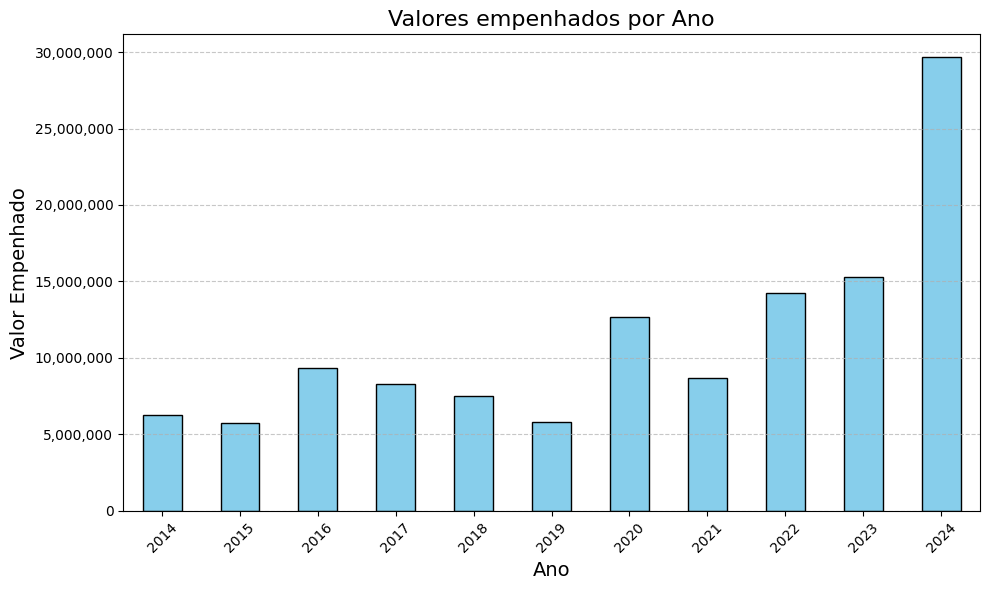

In [159]:
valores_por_ano = df2.groupby('Ano')['Valor Empenhado'].sum()

plt.figure(figsize=(10, 6))
valores_por_ano.plot(kind='bar', color=['skyblue'], edgecolor='black')
plt.title('Valores empenhados por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor Empenhado', fontsize=14)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  #ajusta a escala do eixo y para milhões
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Por meio de um gráfico de linhas, é possível observar de maneira mais clara o crescimento dos investimentos em diversas áreas, permitindo uma comparação eficaz com o aumento das despesas.

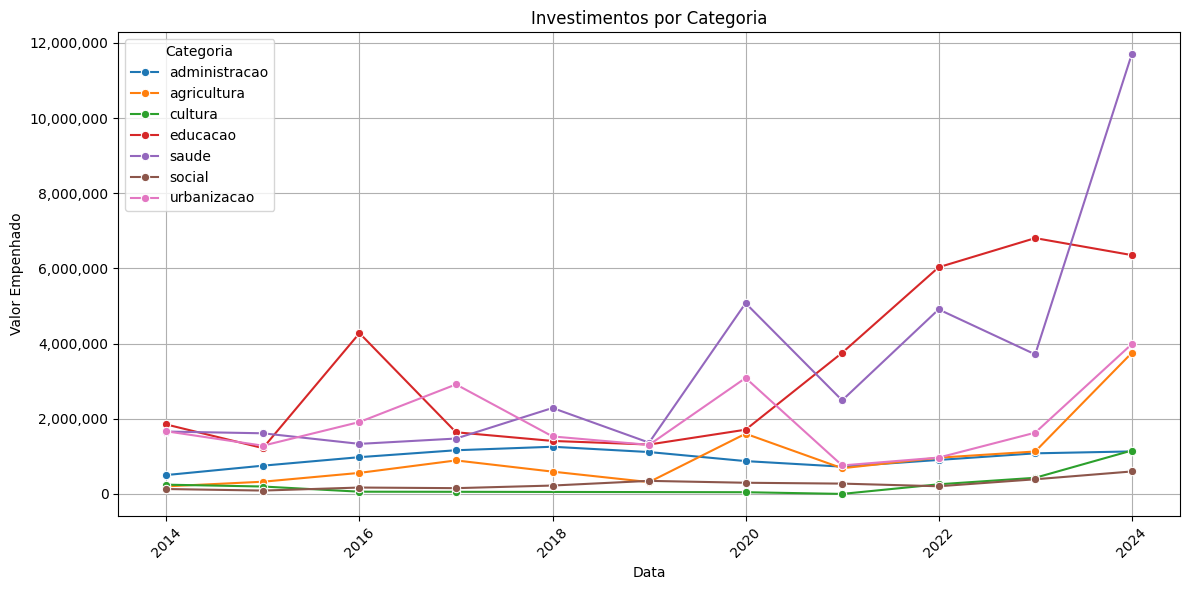

In [160]:
df_categorias = df2.groupby(['Ano', 'categoria'])[['Valor Empenhado']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_categorias, x='Ano', y='Valor Empenhado', hue='categoria', marker='o')


plt.title('Investimentos por Categoria')
plt.xlabel('Data')
plt.ylabel('Valor Empenhado')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

#### Observa-se um expressivo crescimento nos valores destinados a diversas áreas, com destaque para a educação e saúde, que apresentaram os maiores orçamentos nos últimos anos. Além disso, é importante ressaltar o notável aumento de investimentos no setor da saúde em que 1 ano teve seu orçamento de licitações triplicado

In [161]:
df_filtered = df_categorias[df_categorias['Ano'].isin([2014, 2024])]
df_pivot = df_filtered.pivot(index='categoria', columns='Ano', values='Valor Empenhado')
df_pivot['Aumento (%)'] = ((df_pivot[2024] - df_pivot[2014]) / df_pivot[2014]) * 100
df_pivot['Aumento (%)'] = df_pivot['Aumento (%)'].round(2)
df_pivot


Ano,2014,2024,Aumento (%)
categoria,,,
administracao,503981.24,1132390.94,124.69
agricultura,203339.28,3752133.43,1745.26
cultura,247640.00,1155442.57,366.58
educacao,1848862.69,6356383.38,243.80
saude,1661338.58,11698670.28,604.17
social,131967.27,599122.10,353.99
urbanizacao,1667897.28,3986094.75,138.99


#### Analisar as Licitações ajuda a verificar os investimentos nos ultimos anos em obras, saúde, educação e segurança

In [162]:
df4 = df2.copy()

In [163]:
df4.iloc[1,:]

Data                                             2024-01-12 00:00:00
Fonte Recurso      16600000 - Transferência de Recursos do Fundo ...
Unid. Orc           2120 - Fundo Municipal de Ação e Promoção Social
Função                                        8 - Assistência Social
Subfunção                              244 - Assistência Comunitária
Programa           1002 - Promoção social à família, à criança, a...
Ação               2040 - Manutenção das Atividades Bloco da Prot...
Elemento                      92 - Despesas De Exercícios Anteriores
Valor Empenhado                                               315.78
Ano                                                             2024
categoria                                                     social
Name: 51, dtype: object

In [164]:
df4['Mes'] = df4['Data'].dt.month
df4['Dia'] = df4['Data'].dt.day

In [165]:
#extraindo os codigos das categorias

df4['Fonte_Recurso_codigo'] = df4['Fonte Recurso'].str.extract(r'^(\d+)').astype(float)
df4['Unid_Orc_codigo'] = df4['Unid. Orc'].str.extract(r'^(\d+)').astype(float)
df4['Funcao_codigo'] = df4['Função'].str.extract(r'^(\d+)').astype(float)
df4['Subfuncao_codigo'] = df4['Subfunção'].str.extract(r'^(\d+)').astype(float)
df4['Programa_codigo'] = df4['Programa'].str.extract(r'^(\d+)').astype(float)
df4['Acao_codigo'] = df4['Ação'].str.extract(r'^(\d+)').astype(float)
df4['Elemento_codigo'] = df4['Elemento'].str.extract(r'^(\d+)').astype(float)

In [166]:
df4

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,categoria,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo
50,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,social,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0
51,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
112,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,social,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0
119,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
120,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,social,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,2014-11-21,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25,2014,saude,11,21,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5584,2014-11-28,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75,2014,saude,11,28,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5586,2014-12-24,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20,2014,saude,12,24,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0
5587,2014-12-26,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32,2014,saude,12,26,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0


#### usando isolation forest para rotular

In [167]:
df4.columns

Index(['Data', 'Fonte Recurso', 'Unid. Orc', 'Função', 'Subfunção', 'Programa',
       'Ação', 'Elemento', 'Valor Empenhado', 'Ano', 'categoria', 'Mes', 'Dia',
       'Fonte_Recurso_codigo', 'Unid_Orc_codigo', 'Funcao_codigo',
       'Subfuncao_codigo', 'Programa_codigo', 'Acao_codigo',
       'Elemento_codigo'],
      dtype='object')

In [168]:
Treino = df4.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]] 

In [169]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.10, random_state=42)
df4['anomaly'] = model.fit_predict(Treino)
df4 = df4.reset_index(drop=True)

label:

-1 anomalia

 1 normal

In [170]:
df4

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,...,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo,anomaly
0,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,...,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0,1
1,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
2,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,...,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0,1
3,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
4,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,...,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,2014-11-21,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25,2014,...,11,21,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,-1
13897,2014-11-28,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75,2014,...,11,28,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13898,2014-12-24,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20,2014,...,12,24,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13899,2014-12-26,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32,2014,...,12,26,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1


In [171]:
df4.duplicated().sum()

0

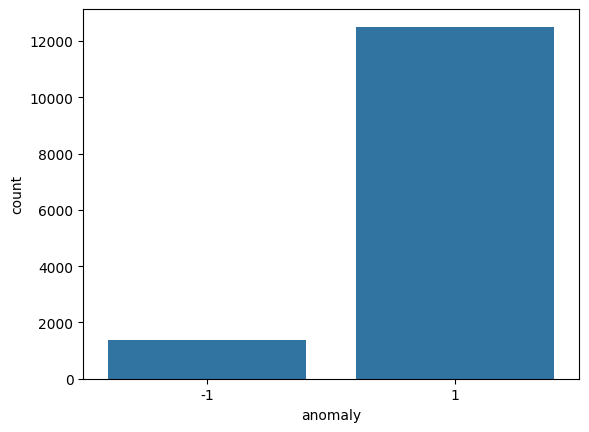

In [172]:
sns.countplot(data = df4, x = "anomaly");

### Investigando a área que teve maior quantidade de anomalias

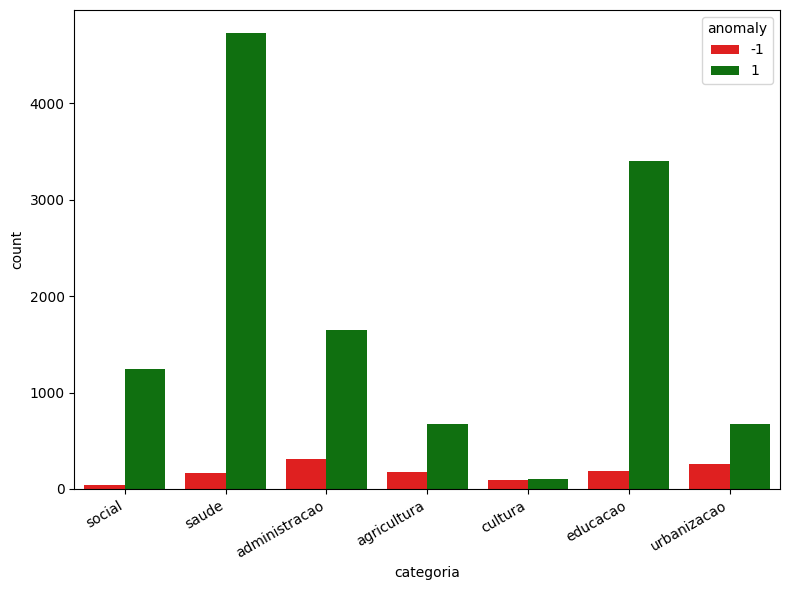

In [173]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df4, x="categoria", hue="anomaly", palette={-1: "red", 1: "green"})
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### Visualizando a distribuição da coluna Valor Empenhado

10.82329808436394


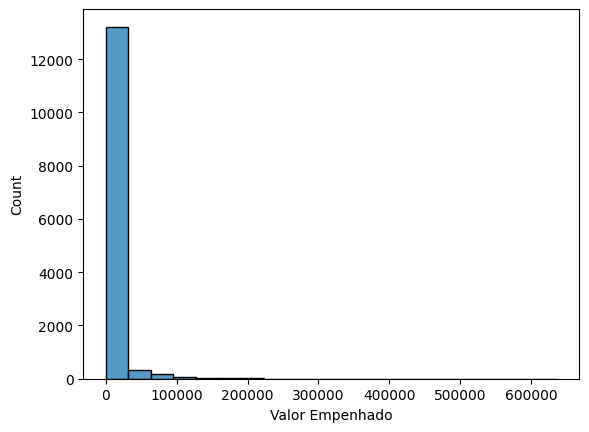

In [174]:
sns.histplot(data = df4, x = "Valor Empenhado", bins = 20);
print(df4["Valor Empenhado"].skew())

A coluna apresenta uma distribuição fortemente assimetrica, afim de tentar ajustar isso, antes de padronizar, apliquei uma transformação logaritmica, pois os outliers podem acabar influenciando muito na padronização e o ideal é que a coluna siga uma distribuição mais proxima da normal

In [175]:
df4['Valor Empenhado'] = np.log1p(df4['Valor Empenhado'])

-1.946200253191448


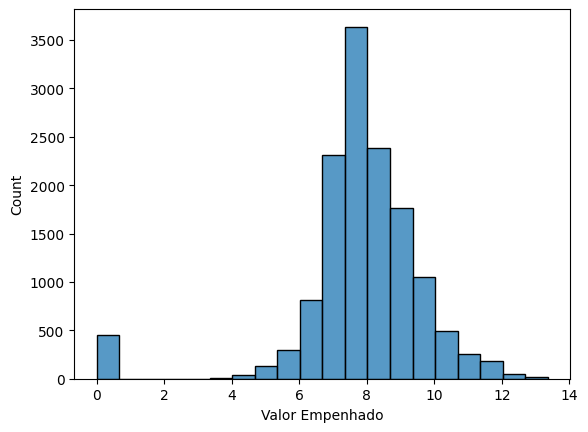

In [176]:
sns.histplot(data = df4, x = "Valor Empenhado", bins = 20);
print(df4["Valor Empenhado"].skew())

#### Reduzindo dimensionalidade

In [177]:
df4.iloc[1,:]

Data                                                  2024-01-12 00:00:00
Fonte Recurso           16600000 - Transferência de Recursos do Fundo ...
Unid. Orc                2120 - Fundo Municipal de Ação e Promoção Social
Função                                             8 - Assistência Social
Subfunção                                   244 - Assistência Comunitária
Programa                1002 - Promoção social à família, à criança, a...
Ação                    2040 - Manutenção das Atividades Bloco da Prot...
Elemento                           92 - Despesas De Exercícios Anteriores
Valor Empenhado                                                  5.758208
Ano                                                                  2024
categoria                                                          social
Mes                                                                     1
Dia                                                                    12
Fonte_Recurso_codigo                  

In [178]:
print(df4["Elemento_codigo"].value_counts())

Elemento_codigo
30.0    5983
39.0    3903
36.0    2550
32.0     541
35.0     243
52.0     218
51.0     212
40.0     101
90.0      89
92.0      54
33.0       3
48.0       2
31.0       1
61.0       1
Name: count, dtype: int64


In [179]:
codigos_validos = df4["Elemento_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Elemento_codigo"].isin(codigos_validos)]
print(df4_filtrado["Elemento_codigo"].nunique())

8



In [180]:
print(df4["Fonte_Recurso_codigo"].value_counts())

Fonte_Recurso_codigo
15001000.0    1705
1001.0        1163
0.0            996
16000000.0     857
2.0            807
              ... 
1390.0           1
1610.0           1
1290.0           1
17210000.0       1
1121.0           1
Name: count, Length: 79, dtype: int64


In [181]:
codigos_validos = df4["Fonte_Recurso_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Fonte_Recurso_codigo"].isin(codigos_validos)]
print(df4_filtrado["Fonte_Recurso_codigo"].nunique())

27


In [182]:
print(df4["Unid_Orc_codigo"].value_counts())

Unid_Orc_codigo
2080.0    3411
2090.0    3024
2150.0    1832
2040.0     727
2020.0     698
2100.0     654
2030.0     608
2060.0     564
2120.0     505
2010.0     448
2170.0     327
2050.0     323
2070.0     266
2140.0     147
2210.0     126
2.0         89
2200.0      72
2180.0      67
2110.0      12
2130.0       1
Name: count, dtype: int64


In [183]:
codigos_validos = df4["Unid_Orc_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Unid_Orc_codigo"].isin(codigos_validos)]

In [184]:
print(df4_filtrado["Unid_Orc_codigo"].nunique())

15


In [185]:
print(df4["Funcao_codigo"].value_counts())

Funcao_codigo
10.0      4822
12.0      3579
4.0       1958
8.0       1294
15.0       932
20.0       845
13.0       192
24.0        91
2080.0      71
18.0        49
27.0        28
26.0        16
2090.0       8
2150.0       6
25.0         2
2170.0       2
14.0         2
23.0         2
2040.0       1
2050.0       1
Name: count, dtype: int64


In [186]:
codigos_validos = df4["Funcao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Funcao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Funcao_codigo"].nunique())

7


In [187]:
print(df4["Subfuncao_codigo"].value_counts())

Subfuncao_codigo
122.0    3238
361.0    2843
301.0    2761
302.0    1569
244.0     908
123.0     570
306.0     421
365.0     225
392.0     180
305.0     165
243.0     152
242.0     146
303.0     115
131.0      91
10.0       75
368.0      70
451.0      69
304.0      55
126.0      38
121.0      34
421.0      33
812.0      27
606.0      26
541.0      21
782.0      16
366.0      15
695.0      10
605.0       7
12.0        7
20.0        4
15.0        2
752.0       2
422.0       2
367.0       1
4.0         1
813.0       1
785.0       1
Name: count, dtype: int64


In [188]:
codigos_validos = df4["Subfuncao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Subfuncao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Subfuncao_codigo"].nunique())

13


In [189]:
print(df4["Programa_codigo"].value_counts())

Programa_codigo
1001.0    1808
1003.0    1794
1027.0    1606
1007.0    1604
2001.0     746
1004.0     653
2004.0     645
1002.0     582
2011.0     578
2015.0     551
1037.0     441
1006.0     378
2003.0     305
2013.0     253
1017.0     234
2010.0     225
1005.0     198
1022.0     190
1020.0     174
1018.0     147
2019.0     134
2021.0     104
1026.0     102
1032.0      65
302.0       59
1031.0      54
1021.0      52
1008.0      41
1030.0      38
2017.0      28
1.0         24
2020.0      12
1025.0      11
301.0       10
1034.0       8
1010.0       8
1016.0       7
122.0        7
303.0        6
4.0          6
361.0        6
1029.0       2
1028.0       2
365.0        1
1033.0       1
1014.0       1
Name: count, dtype: int64


In [190]:
codigos_validos = df4["Programa_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Programa_codigo"].isin(codigos_validos)]
print(df4_filtrado["Programa_codigo"].nunique())

23


In [191]:
print(df4["Acao_codigo"].value_counts())

Acao_codigo
2057.0    1180
2058.0    1126
2032.0     751
2006.0     645
2008.0     615
          ... 
1044.0       1
2071.0       1
1027.0       1
1010.0       1
2100.0       1
Name: count, Length: 121, dtype: int64


In [192]:
codigos_validos = df4["Acao_codigo"].value_counts()
codigos_validos = codigos_validos[codigos_validos > 100].index

df4_filtrado = df4[df4["Acao_codigo"].isin(codigos_validos)]
print(df4_filtrado["Acao_codigo"].nunique())

35


In [193]:
df4 = df4.dropna()

In [194]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("=" * 80)
print("PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING")
print("=" * 80)

X_desbalanceado = df4_filtrado.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]].copy() 
y_desbalanceado = df4_filtrado['anomaly'].copy()  

print(f"Dataset: {len(X_desbalanceado):,} registros financeiros")
print(f"Shape: {X_desbalanceado.shape}")
print(f"Classes: Normal={sum(y_desbalanceado==1)}, Anomalia={sum(y_desbalanceado==-1)}")
print(f"Features utilizadas:")
for i, col in enumerate(X_desbalanceado.columns):
    print(f"  {i+1}. {col}")

X_desbalanceado_train, X_desbalanceado_test, y_desbalanceado_train, y_desbalanceado_test = train_test_split(
    X_desbalanceado, y_desbalanceado, test_size=0.2, random_state=42, stratify=y_desbalanceado
)

print(f"\nDivisão dos dados:")
print(f"  Treino: {len(X_desbalanceado_train):,} registros ({len(X_desbalanceado_train)/len(X_desbalanceado)*100:.1f}%)")
print(f"  Teste: {len(X_desbalanceado_test):,} registros ({len(X_desbalanceado_test)/len(X_desbalanceado)*100:.1f}%)")

scaler = StandardScaler()
X_desbalanceado_train_scaled = scaler.fit_transform(X_desbalanceado_train)
X_desbalanceado_test_scaled = scaler.transform(X_desbalanceado_test)

print(f"\nDados normalizados com StandardScaler")
print(f"  Media antes: {X_desbalanceado_train.mean().mean():.4f}")
print(f"  Media depois: {X_desbalanceado_train_scaled.mean():.4f}")
print(f"  Desvio antes: {X_desbalanceado_train.std().mean():.4f}")  
print(f"  Desvio depois: {X_desbalanceado_train_scaled.std():.4f}")

train_anomalias = (y_desbalanceado_train == -1).sum()
train_normais = (y_desbalanceado_train == 1).sum()
test_anomalias = (y_desbalanceado_test == -1).sum() 
test_normais = (y_desbalanceado_test == 1).sum()

print(f"\nDistribuição das classes:")
print(f"  TREINO - Anomalias: {train_anomalias:,} ({train_anomalias/len(y_desbalanceado_train)*100:.1f}%) | Normais: {train_normais:,} ({train_normais/len(y_desbalanceado_train)*100:.1f}%)")
print(f"  TESTE  - Anomalias: {test_anomalias:,} ({test_anomalias/len(y_desbalanceado_test)*100:.1f}%) | Normais: {test_normais:,} ({test_normais/len(y_desbalanceado_test)*100:.1f}%)")

print("\n" + "=" * 80)

PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING
Dataset: 12,216 registros financeiros
Shape: (12216, 11)
Classes: Normal=11472, Anomalia=744
Features utilizadas:
  1. Valor Empenhado
  2. Ano
  3. Mes
  4. Dia
  5. Fonte_Recurso_codigo
  6. Unid_Orc_codigo
  7. Funcao_codigo
  8. Subfuncao_codigo
  9. Programa_codigo
  10. Acao_codigo
  11. Elemento_codigo

Divisão dos dados:
  Treino: 9,772 registros (80.0%)
  Teste: 2,444 registros (20.0%)

Dados normalizados com StandardScaler
  Media antes: 571124.6817
  Media depois: 0.0000
  Desvio antes: 689821.9103
  Desvio depois: 1.0000

Distribuição das classes:
  TREINO - Anomalias: 595 (6.1%) | Normais: 9,177 (93.9%)
  TESTE  - Anomalias: 149 (6.1%) | Normais: 2,295 (93.9%)



In [195]:
anomalias = df4[df4['anomaly'] == -1]
normais = df4[df4['anomaly'] == 1].sample(n=6000, random_state=42)

df_balanceado = pd.concat([anomalias, normais]).sample(frac=1, random_state=42).reset_index(drop=True)

In [196]:
print("=" * 80)
print("PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING")
print("=" * 80)

X_balanceado = df_balanceado.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]].copy() 
y_balanceado = df_balanceado['anomaly'].copy()  

print(f"Dataset: {len(X_balanceado):,} registros financeiros")
print(f"Shape: {X_balanceado.shape}")
print(f"Classes: Normal={sum(y_balanceado==1)}, Anomalia={sum(y_balanceado==-1)}")
print(f"Features utilizadas:")
for i, col in enumerate(X_desbalanceado.columns):
    print(f"  {i+1}. {col}")

X_balanceado_train, X_balanceado_test, y_balanceado_train, y_balanceado_test = train_test_split(
    X_balanceado, y_balanceado, test_size=0.2, random_state=42, stratify=y_balanceado
)

print(f"\nDivisão dos dados:")
print(f"  Treino: {len(X_balanceado_train):,} registros ({len(X_balanceado_train)/len(X_balanceado)*100:.1f}%)")
print(f"  Teste: {len(X_balanceado_test):,} registros ({len(X_balanceado_test)/len(X_balanceado)*100:.1f}%)")

scaler = StandardScaler()
X_balanceado_train_scaled = scaler.fit_transform(X_balanceado_train)
X_balanceado_test_scaled = scaler.transform(X_balanceado_test)

print(f"\nDados normalizados com StandardScaler")
print(f"  Media antes: {X_balanceado_train.mean().mean():.4f}")
print(f"  Media depois: {X_balanceado_train_scaled.mean():.4f}")
print(f"  Desvio antes: {X_balanceado_train.std().mean():.4f}")  
print(f"  Desvio depois: {X_balanceado_train_scaled.std():.4f}")

train_anomalias = (y_balanceado_train == -1).sum()
train_normais = (y_balanceado_train == 1).sum()
test_anomalias = (y_balanceado_test == -1).sum() 
test_normais = (y_balanceado_test == 1).sum()

print(f"\nDistribuição das classes:")
print(f"  TREINO - Anomalias: {train_anomalias:,} ({train_anomalias/len(y_balanceado_train)*100:.1f}%) | Normais: {train_normais:,} ({train_normais/len(y_balanceado_train)*100:.1f}%)")
print(f"  TESTE  - Anomalias: {test_anomalias:,} ({test_anomalias/len(y_balanceado_test)*100:.1f}%) | Normais: {test_normais:,} ({test_normais/len(y_balanceado_test)*100:.1f}%)")

print("\n" + "=" * 80)

PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING
Dataset: 7,143 registros financeiros
Shape: (7143, 11)
Classes: Normal=6000, Anomalia=1143
Features utilizadas:
  1. Valor Empenhado
  2. Ano
  3. Mes
  4. Dia
  5. Fonte_Recurso_codigo
  6. Unid_Orc_codigo
  7. Funcao_codigo
  8. Subfuncao_codigo
  9. Programa_codigo
  10. Acao_codigo
  11. Elemento_codigo

Divisão dos dados:
  Treino: 5,714 registros (80.0%)
  Teste: 1,429 registros (20.0%)

Dados normalizados com StandardScaler
  Media antes: 588658.7774
  Media depois: -0.0000
  Desvio antes: 698578.2354
  Desvio depois: 1.0000

Distribuição das classes:
  TREINO - Anomalias: 914 (16.0%) | Normais: 4,800 (84.0%)
  TESTE  - Anomalias: 229 (16.0%) | Normais: 1,200 (84.0%)


PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING
Dataset: 7,143 registros financeiros
Shape: (7143, 11)
Classes: Normal=6000, Anomalia=1143
Features utilizadas:
  1. Valor Empenhado
  2. Ano
  3. Mes
  4. Dia
  5. Fonte_Recurso_codigo
  6. Unid_Orc_codigo
  7. Funcao_codigo
  8

## 1. ÁRVORE DE DECISÃO 

In [197]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_desbalanceado_train_scaled, y_desbalanceado_train)

y_desbalanceado_train_pred_dt = dt_model.predict(X_desbalanceado_train_scaled)
y_desbalanceado_test_pred_dt = dt_model.predict(X_desbalanceado_test_scaled)

train_acc_dt = accuracy_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt)
train_f1_dt = f1_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt)
test_f1_dt = f1_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_desbalanceado_test, y_desbalanceado_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_desbalanceado_test, y_desbalanceado_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_desbalanceado_test_pred_dt == -1).sum()
anomalias_reais = (y_desbalanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 1.0000
  F1-Score: 1.0000
  Precisao: 1.0000
  Recall: 1.0000

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9787
  F1-Score: 0.9790
  Precisao: 0.9795
  Recall: 0.9787

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.81      0.86      0.83       149
      Normal       0.99      0.99      0.99      2295

    accuracy                           0.98      2444
   macro avg       0.90      0.92      0.91      2444
weighted avg       0.98      0.98      0.98      2444


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 128    21]
     Norm  [  31  2264]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 149
  Anomalias detectadas: 159
  Taxa de deteccao: 85.91% (128/149)


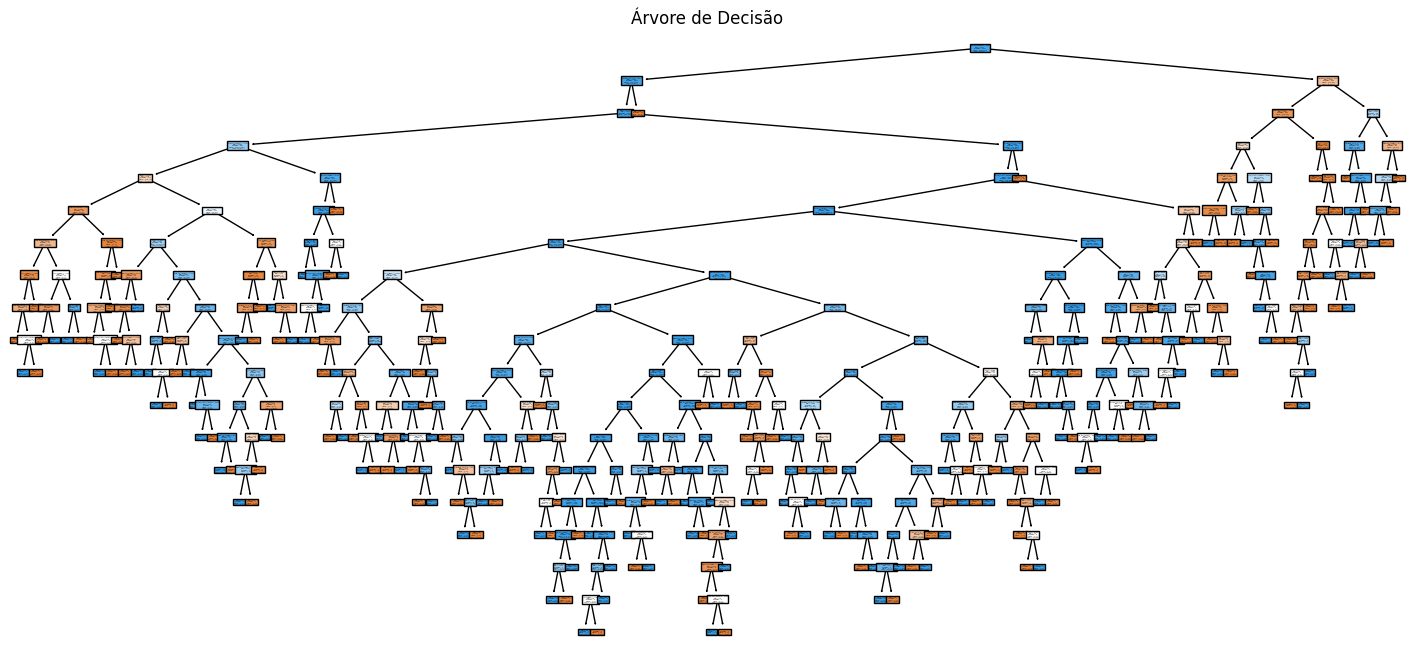

Profundidade da árvore: 18


In [198]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_desbalanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

In [199]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_desbalanceado_train_scaled, y_desbalanceado_train)
ccp_alphas = path.ccp_alphas

In [200]:
scores = []
num_leaves = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    cv_score = cross_val_score(clf, X_desbalanceado_train_scaled, y_desbalanceado_train, cv=5, scoring='f1_weighted').mean()
    clf.fit(X_desbalanceado_train_scaled, y_desbalanceado_train)
    scores.append(cv_score)
    num_leaves.append(clf.get_n_leaves())

print(scores)
print(num_leaves)


[0.9773489533359628, 0.9773489533359628, 0.9773489533359628, 0.9773489533359628, 0.9773489533359628, 0.9774444461517543, 0.9774444461517543, 0.9774444461517543, 0.9773512615513958, 0.9773512615513958, 0.9773512615513958, 0.9773512615513958, 0.9773512615513958, 0.9773329212766162, 0.9773329212766162, 0.9773329212766162, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9772424460289753, 0.9769025383645571, 0.9776833631493188, 0.9779036279783531, 0.9787024989032476, 0.978675808650974, 0.978675808650974, 0.978675808650974, 0.978675808650974, 0.9786685042561298, 0.9786685042561298, 0.9786685042561298, 0.9786685042561298, 0.9786685042561298, 0.978562978655401, 0.978562978655401, 0.978562978655401, 0.978562978655401, 0.9786451874848507, 0.97864

In [201]:
criterios = [(1 - s) + a * l for s, a, l in zip(scores, ccp_alphas, num_leaves)]
best_idx = np.argmin(criterios)
best_alpha = ccp_alphas[best_idx]

print(f"Melhor alpha: {best_alpha}")
print(f"Score: {scores[best_idx]}, Folhas: {num_leaves[best_idx]}")

Melhor alpha: 0.0
Score: 0.9773489533359628, Folhas: 216


#### balanceado

In [202]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt = dt_model.predict(X_balanceado_train_scaled)
y_test_pred_dt = dt_model.predict(X_balanceado_test_scaled)

train_acc_dt = accuracy_score(y_balanceado_train, y_train_pred_dt)
train_f1_dt = f1_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_balanceado_train, y_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_balanceado_test, y_test_pred_dt)
test_f1_dt = f1_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_balanceado_test, y_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_balanceado_test, y_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_test_pred_dt == -1).sum()
anomalias_reais = (y_balanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 1.0000
  F1-Score: 1.0000
  Precisao: 1.0000
  Recall: 1.0000

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9650
  F1-Score: 0.9649
  Precisao: 0.9648
  Recall: 0.9650

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.90      0.88      0.89       229
      Normal       0.98      0.98      0.98      1200

    accuracy                           0.97      1429
   macro avg       0.94      0.93      0.93      1429
weighted avg       0.96      0.97      0.96      1429


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 202    27]
     Norm  [  23  1177]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 229
  Anomalias detectadas: 225
  Taxa de deteccao: 88.21% (202/229)


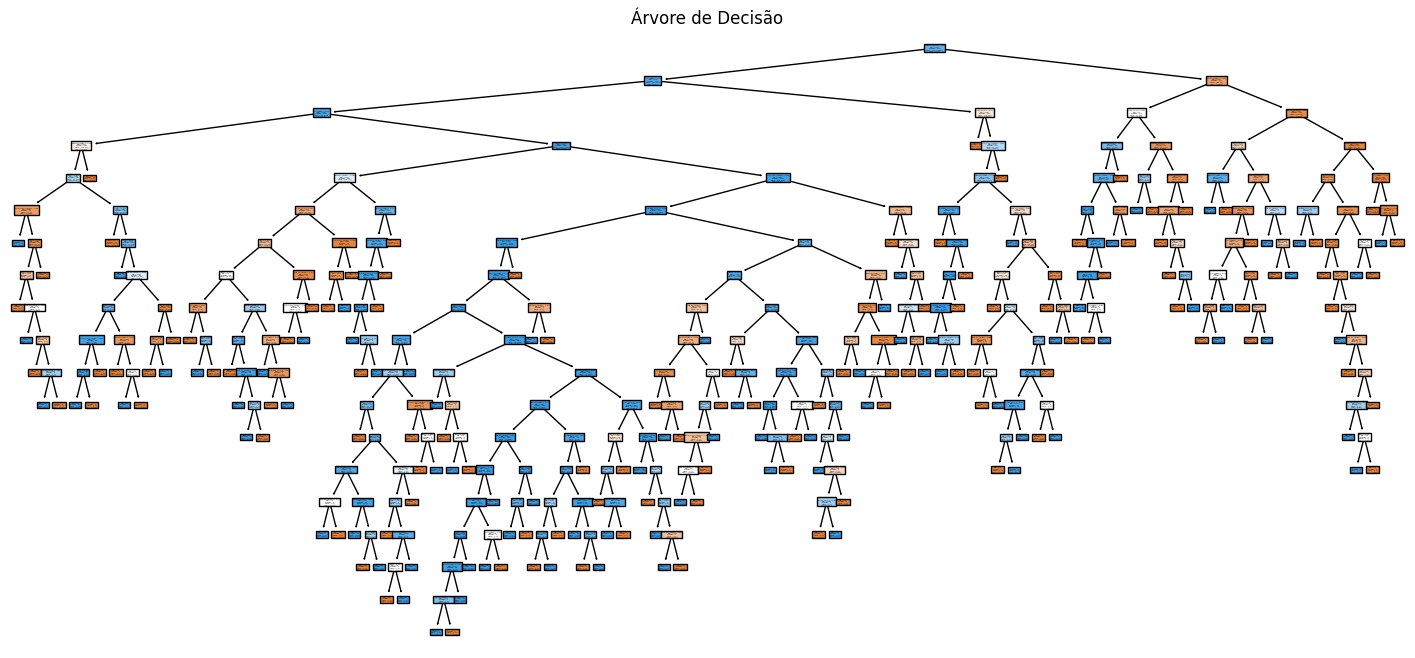

Profundidade da árvore: 18


In [203]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_balanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

In [204]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_balanceado_train_scaled, y_balanceado_train)
ccp_alphas = path.ccp_alphas

In [205]:
ccp_alphas = np.unique(ccp_alphas)
ccp_alphas = ccp_alphas[ccp_alphas > 0]

In [206]:
scores = []
num_leaves = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    cv_score = cross_val_score(clf, X_balanceado_train_scaled, y_balanceado_train, cv=5, scoring='f1_weighted').mean()
    clf.fit(X_balanceado_train_scaled, y_balanceado_train)
    scores.append(cv_score)
    num_leaves.append(clf.get_n_leaves())

print(scores)
print(num_leaves)

[0.9637614229442416, 0.9637614229442416, 0.9637614229442416, 0.963614642869316, 0.963447507607454, 0.963447507607454, 0.963447507607454, 0.963447507607454, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9632595631179394, 0.9634273874728105, 0.9631193093173416, 0.96255916167502, 0.9634420002700906, 0.9631065076236723, 0.963672086311132, 0.9640025076483489, 0.9639965343633413, 0.9639965343633413, 0.9639965343633413, 0.9639965343633413, 0.9639965343633413, 0.9627602243534679, 0.9627602243534679, 0.9627602243534679, 0.9627602243534679, 0.9639870763305943, 0.9639870763305943, 0.9639870763305943, 0.9639870763305943, 0.9638161201160497, 0.9641466990973914, 0.9641466990973914, 0.9641466990973914, 0.963991975290228, 0.9630996544168389, 0.9630996544168389, 0.9630996544168389, 0.9630996544168389, 0.9633237265552284, 0.9633261382222733, 0.9633787013701761, 0.9643841245347288, 0.964929

In [207]:
criterios_balanceado = [(1 - s) + a * l for s, a, l in zip(scores, ccp_alphas, num_leaves)]
menor_criterio = min(criterios_balanceado)
indices_menor_criterio = [i for i, c in enumerate(criterios_balanceado) if c == menor_criterio]
best_idx = min(indices_menor_criterio, key=lambda i: num_leaves[i])
best_alpha = ccp_alphas[best_idx]

print(f"Melhor alpha: {best_alpha}")
print(f"Score: {scores[best_idx]}, Folhas: {num_leaves[best_idx]}")

Melhor alpha: 0.00011668020721802262
Score: 0.9637614229442416, Folhas: 173


#### Usando o alpha como o professor sugeriu ficou overfitado ainda a arvore ai decidi ir poldando a arvore ate achar um valor que diminua a complexidade e ainda de boas metricas

In [208]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth= 11 )
dt_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt = dt_model.predict(X_balanceado_train_scaled)
y_test_pred_dt = dt_model.predict(X_balanceado_test_scaled)

train_acc_dt = accuracy_score(y_balanceado_train, y_train_pred_dt)
train_f1_dt = f1_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_balanceado_train, y_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_balanceado_test, y_test_pred_dt)
test_f1_dt = f1_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_balanceado_test, y_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_balanceado_test, y_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_test_pred_dt == -1).sum()
anomalias_reais = (y_balanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9916
  F1-Score: 0.9915
  Precisao: 0.9916
  Recall: 0.9916

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9664
  F1-Score: 0.9660
  Precisao: 0.9659
  Recall: 0.9664

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.92      0.86      0.89       229
      Normal       0.97      0.99      0.98      1200

    accuracy                           0.97      1429
   macro avg       0.95      0.93      0.94      1429
weighted avg       0.97      0.97      0.97      1429


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 198    31]
     Norm  [  17  1183]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 229
  Anomalias detectadas: 215
  Taxa de deteccao: 86.46% (198/229)
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9916
  F1-Score: 0.9915
  Precisao: 0.9916
  Recall: 0.9916

METRICAS NO CONJUNTO DE TESTE:
 

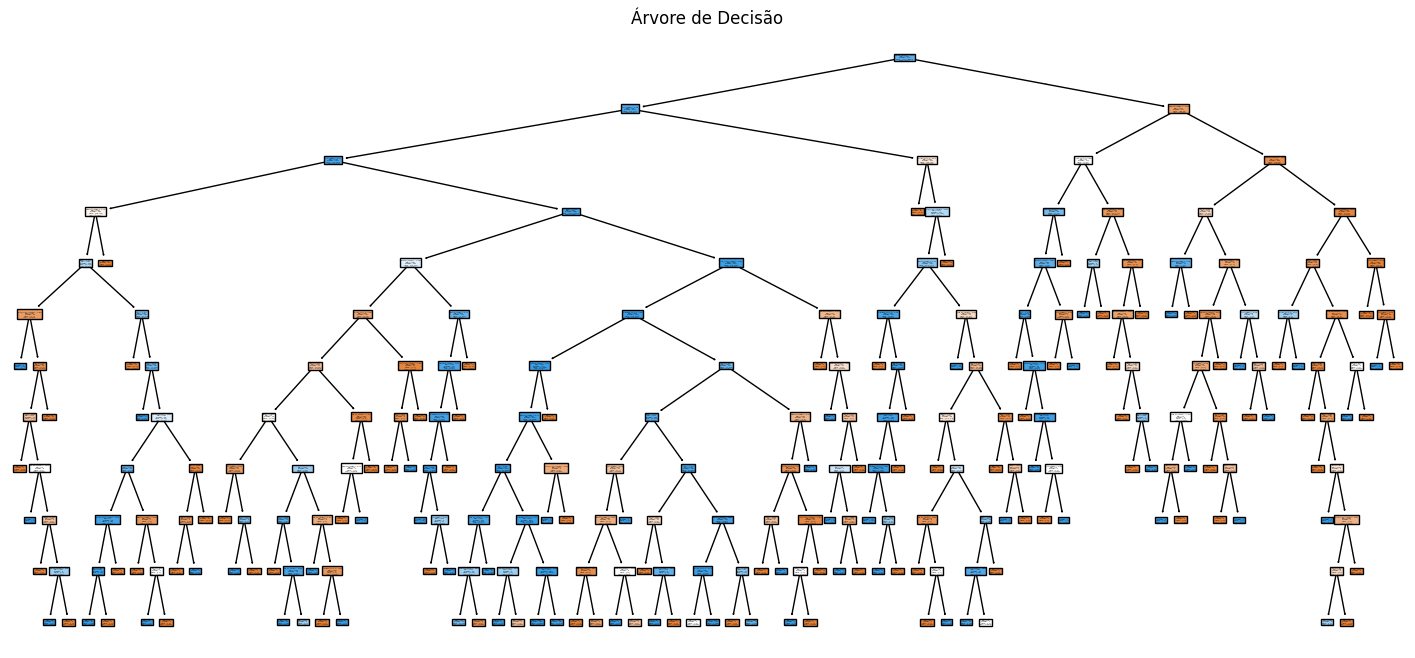

Profundidade da árvore: 11


In [209]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_balanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

In [210]:
confusion_matrix(y_balanceado_test, y_test_pred_dt)

array([[ 198,   31],
       [  17, 1183]], dtype=int64)

## SVM

In [211]:
print("=" * 60)
print("SVM")
print("=" * 60)

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_svm = svm_model.predict(X_balanceado_train_scaled)
y_test_pred_svm = svm_model.predict(X_balanceado_test_scaled)

train_acc_svm = accuracy_score(y_balanceado_train, y_train_pred_svm)
train_f1_svm = f1_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_precision_svm = precision_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_balanceado_train, y_train_pred_svm, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_svm:.4f}")
print(f"  F1-Score: {train_f1_svm:.4f}")
print(f"  Precisao: {train_precision_svm:.4f}")
print(f"  Recall: {train_recall_svm:.4f}")

test_acc_svm = accuracy_score(y_balanceado_test, y_test_pred_svm)
test_f1_svm = f1_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_precision_svm = precision_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_balanceado_test, y_test_pred_svm, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_svm:.4f}")
print(f"  F1-Score: {test_f1_svm:.4f}")
print(f"  Precisao: {test_precision_svm:.4f}")
print(f"  Recall: {test_recall_svm:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_svm, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_svm = confusion_matrix(y_balanceado_test, y_test_pred_svm)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_svm[0,0]:4d}  {cm_svm[0,1]:4d}]")
print(f"     Norm  [{cm_svm[1,0]:4d}  {cm_svm[1,1]:4d}]")
print()

anomalias_detectadas_svm = (y_test_pred_svm == -1).sum()
taxa_deteccao_svm = cm_svm[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas_svm}")
print(f"  Taxa de deteccao: {taxa_deteccao_svm:.2%} ({cm_svm[0,0]}/{anomalias_reais})")

SVM
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9753
  F1-Score: 0.9751
  Precisao: 0.9750
  Recall: 0.9753

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9657
  F1-Score: 0.9652
  Precisao: 0.9652
  Recall: 0.9657

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.92      0.86      0.89       229
      Normal       0.97      0.99      0.98      1200

    accuracy                           0.97      1429
   macro avg       0.95      0.92      0.93      1429
weighted avg       0.97      0.97      0.97      1429


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 197    32]
     Norm  [  17  1183]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 229
  Anomalias detectadas: 214
  Taxa de deteccao: 86.03% (197/229)
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9753
  F1-Score: 0.9751
  Precisao: 0.9750
  Recall: 0.9753

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9

In [212]:
k_folds = 5

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}


In [213]:
svm = SVC(random_state=42)
grid = GridSearchCV(svm, param_grid, cv=k_folds, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_balanceado_train_scaled, y_balanceado_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [214]:
print("Melhores parâmetros encontrados:", grid.best_params_)
print("Melhor score de validação (f1):", grid.best_score_)

Melhores parâmetros encontrados: {'C': 10, 'gamma': 0.1}
Melhor score de validação (f1): 0.9733176032811434


In [215]:
print("=" * 60)
print("SVM")
print("=" * 60)

svm_model = SVC(random_state=42, probability=True, C=10, gamma=0.1)
svm_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_svm = svm_model.predict(X_balanceado_train_scaled)
y_test_pred_svm = svm_model.predict(X_balanceado_test_scaled)

train_acc_svm = accuracy_score(y_balanceado_train, y_train_pred_svm)
train_f1_svm = f1_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_precision_svm = precision_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_balanceado_train, y_train_pred_svm, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_svm:.4f}")
print(f"  F1-Score: {train_f1_svm:.4f}")
print(f"  Precisao: {train_precision_svm:.4f}")
print(f"  Recall: {train_recall_svm:.4f}")

test_acc_svm = accuracy_score(y_balanceado_test, y_test_pred_svm)
test_f1_svm = f1_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_precision_svm = precision_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_balanceado_test, y_test_pred_svm, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_svm:.4f}")
print(f"  F1-Score: {test_f1_svm:.4f}")
print(f"  Precisao: {test_precision_svm:.4f}")
print(f"  Recall: {test_recall_svm:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_svm, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_svm = confusion_matrix(y_balanceado_test, y_test_pred_svm)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_svm[0,0]:4d}  {cm_svm[0,1]:4d}]")
print(f"     Norm  [{cm_svm[1,0]:4d}  {cm_svm[1,1]:4d}]")
print()

anomalias_detectadas_svm = (y_test_pred_svm == -1).sum()
taxa_deteccao_svm = cm_svm[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas_svm}")
print(f"  Taxa de deteccao: {taxa_deteccao_svm:.2%} ({cm_svm[0,0]}/{anomalias_reais})")

SVM
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9869
  F1-Score: 0.9869
  Precisao: 0.9869
  Recall: 0.9869

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9685
  F1-Score: 0.9684
  Precisao: 0.9684
  Recall: 0.9685

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.91      0.90      0.90       229
      Normal       0.98      0.98      0.98      1200

    accuracy                           0.97      1429
   macro avg       0.94      0.94      0.94      1429
weighted avg       0.97      0.97      0.97      1429


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 205    24]
     Norm  [  21  1179]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 229
  Anomalias detectadas: 226
  Taxa de deteccao: 89.52% (205/229)
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9869
  F1-Score: 0.9869
  Precisao: 0.9869
  Recall: 0.9869

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9

In [216]:
confusion_matrix(y_balanceado_test, y_test_pred_svm)

array([[ 205,   24],
       [  21, 1179]], dtype=int64)

## REDE NEURAL

REDE NEURAL

Dataset para Keras: 5714 amostras, 11 features
Classes: (array([0, 1]), array([ 914, 4800], dtype=int64))
TREINAMENTO SIMPLES



c:\Users\janay\Analise-de-dados-do-setor-financeiro-do-municipio-de-Teixeira-PB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Arquitetura da Rede Neural:


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

None

Cálculo de parâmetros:
Camada 1: (11 entradas + 1 bias) × 20 neurônios = 12 × 20 = 240 parâmetros
Camada 2: (20 entradas + 1 bias) × 10 neurônios = 21 × 10 = 210 parâmetros
Saída: (10 entradas + 1 bias) × 1 neurônio = 11 × 1 = 11 parâmetros
Total: 240 + 210 + 11 = 461 parâmetros
Epoch 1/100
Epoch 1/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.5679
Epoch 2/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.5679
Epoch 2/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4701
Epoch 3/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4701
Epoch 3/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4472
Epoch 4/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4472
Epoch 4/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4398
Epoch 5/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.4398
Epoch 

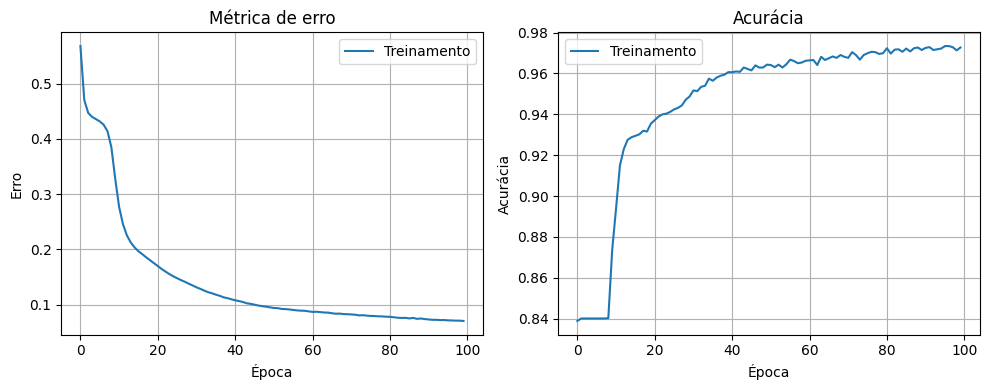


--> Acurácia (treino): 0.9758
--> Acurácia (teste): 0.9608
--> E_out - E_in = 0.0400
--> acc_train - acc_test = 0.0150


In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn import model_selection
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold

print("REDE NEURAL")
print()

BATCH_SIZE = 16
RANDOM_STATE = 2

# Usando dados balanceados já preparados
X = X_balanceado_train_scaled
y = y_balanceado_train

# Convertendo para numpy arrays (formato que o Keras espera)
X = np.array(X)
y = np.array(y)

# Transformando labels de {-1, 1} para {0, 1} (padrão para classificação binária)
y_keras = np.where(y == -1, 0, 1)
y_test_keras = np.where(y_balanceado_test == -1, 0, 1)

print(f"Dataset para Keras: {X.shape[0]} amostras, {X.shape[1]} features")
print(f"Classes: {np.unique(y_keras, return_counts=True)}")

# TREINAMENTO SIMPLES (sem validação)
print("TREINAMENTO SIMPLES")
print()

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Gradiente Descendente 
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print("\nArquitetura da Rede Neural:")
print(model.summary())

print("\nCálculo de parâmetros:")
print("Camada 1: (11 entradas + 1 bias) × 20 neurônios = 12 × 20 = 240 parâmetros")
print("Camada 2: (20 entradas + 1 bias) × 10 neurônios = 21 × 10 = 210 parâmetros")
print("Saída: (10 entradas + 1 bias) × 1 neurônio = 11 × 1 = 11 parâmetros")
print("Total: 240 + 210 + 11 = 461 parâmetros")

# Treinamento
history = model.fit(X, y_keras, epochs=100, batch_size=BATCH_SIZE)

# Plot da curva de treinamento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Métrica de erro')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtendo métricas
E_in, acc_train = model.evaluate(X, y_keras, batch_size=BATCH_SIZE, verbose=0)
E_out, acc_test = model.evaluate(X_balanceado_test_scaled, y_test_keras, batch_size=BATCH_SIZE, verbose=0)

print(f'\n--> Acurácia (treino): {acc_train:.4f}')
print(f'--> Acurácia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - E_in:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

In [218]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Carregando dataset principal
df4 = pd.concat([df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24], ignore_index=True)

# Convertendo valores monetários para numeric
valor_cols = ['Valor Empenhado', 'Valor Liquidado', 'Valor Pago', 'Valor Anulado', ' Valor Saldo']
for col in valor_cols:
    if col in df4.columns:
        df4[col] = pd.to_numeric(df4[col].astype(str).str.replace(',', '.').str.replace('R$', '').str.strip(), errors='coerce')

# Limpando valores anulados e saldo
df4['Valor_Anulado_Clean'] = df4['Valor Anulado'].fillna(0)
df4['Valor_Saldo_Clean'] = df4[' Valor Saldo'].fillna(0)

# Adicionando coluna de ano
df4['Ano'] = pd.to_datetime(df4['Data'], errors='coerce').dt.year

print(f"Dataset original: {len(df4):,} registros")

# Features categóricas para converter
cat_cols = ['Função', 'Subfunção', 'Programa', 'Ação', 'Elemento']
for col in cat_cols:
    if col in df4.columns:
        le = LabelEncoder()
        df4[col + '_encoded'] = le.fit_transform(df4[col].astype(str))

# Features numéricas finais
features_numericas = ['Função_encoded', 'Subfunção_encoded', 'Programa_encoded', 
                     'Ação_encoded', 'Elemento_encoded', 'Valor Empenhado', 
                     'Valor Liquidado', 'Valor Pago', 'Valor_Anulado_Clean', 
                     'Valor_Saldo_Clean', 'Ano']

# Filtrando dados válidos
df4_filtrado = df4.dropna(subset=features_numericas).copy()
df4_filtrado = df4_filtrado[df4_filtrado['Valor Empenhado'] > 0].copy()

print(f"Dataset após filtros: {len(df4_filtrado):,} registros")

# Preparando features X
X_temp = df4_filtrado[features_numericas].copy()

print(f"Features: {list(X_temp.columns)}")
print(f"Shape: {X_temp.shape}")

# Detectando anomalias com Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
y_temp = model.fit_predict(X_temp)

print(f"Anomalias detectadas: {np.sum(y_temp == -1):,}")
print(f"Normais: {np.sum(y_temp == 1):,}")

# Balanceando dados
anomalias_idx = np.where(y_temp == -1)[0]
normais_idx = np.where(y_temp == 1)[0]

# Selecionando amostra balanceada
np.random.seed(42)
n_anomalias = len(anomalias_idx)
n_normais = min(6000, len(normais_idx))

if len(normais_idx) > n_normais:
    normais_selected = np.random.choice(normais_idx, size=n_normais, replace=False)
else:
    normais_selected = normais_idx

# Combinando anomalias + normais selecionados
balanced_idx = np.concatenate([anomalias_idx, normais_selected])
np.random.shuffle(balanced_idx)

X_balanceado = X_temp.iloc[balanced_idx].copy()
y_balanceado = pd.Series(y_temp[balanced_idx])

print(f"Dataset balanceado: {len(X_balanceado):,} registros")
print(f"Anomalias: {np.sum(y_balanceado == -1):,}")
print(f"Normais: {np.sum(y_balanceado == 1):,}")

# Dividindo em treino/teste
X_balanceado_train, X_balanceado_test, y_balanceado_train, y_balanceado_test = train_test_split(
    X_balanceado, y_balanceado, test_size=0.3, random_state=42, stratify=y_balanceado
)

# Escalonando dados
scaler = StandardScaler()
X_balanceado_train_scaled = scaler.fit_transform(X_balanceado_train)
X_balanceado_test_scaled = scaler.transform(X_balanceado_test)

print(f"\nTreino: {len(X_balanceado_train_scaled)} amostras")
print(f"Teste: {len(X_balanceado_test_scaled)} amostras")
print(f"Features: {X_balanceado_train_scaled.shape[1]}")


Dataset original: 86,895 registros
Dataset após filtros: 17,298 registros
Features: ['Função_encoded', 'Subfunção_encoded', 'Programa_encoded', 'Ação_encoded', 'Elemento_encoded', 'Valor Empenhado', 'Valor Liquidado', 'Valor Pago', 'Valor_Anulado_Clean', 'Valor_Saldo_Clean', 'Ano']
Shape: (17298, 11)
Anomalias detectadas: 1,728
Normais: 15,570
Dataset balanceado: 7,728 registros
Anomalias: 1,728
Normais: 6,000

Treino: 5409 amostras
Teste: 2319 amostras
Features: 11
Anomalias detectadas: 1,728
Normais: 15,570
Dataset balanceado: 7,728 registros
Anomalias: 1,728
Normais: 6,000

Treino: 5409 amostras
Teste: 2319 amostras
Features: 11


TREINAMENTO COM VALIDAÇÃO

Epoch 1/100


c:\Users\janay\Analise-de-dados-do-setor-financeiro-do-municipio-de-Teixeira-PB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8372 - loss: 0.5847 - val_accuracy: 0.8486 - val_loss: 0.5073
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8372 - loss: 0.5847 - val_accuracy: 0.8486 - val_loss: 0.5073
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4865 - val_accuracy: 0.8486 - val_loss: 0.4551
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4865 - val_accuracy: 0.8486 - val_loss: 0.4551
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4577 - val_accuracy: 0.8486 - val_loss: 0.4368
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4577 - val_accuracy: 0.8486 - val_loss: 0.4368
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4475 - val_accuracy: 0.8486 - val_loss: 0.4293
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8379 - loss: 0.4475 - val_accuracy: 0.8486

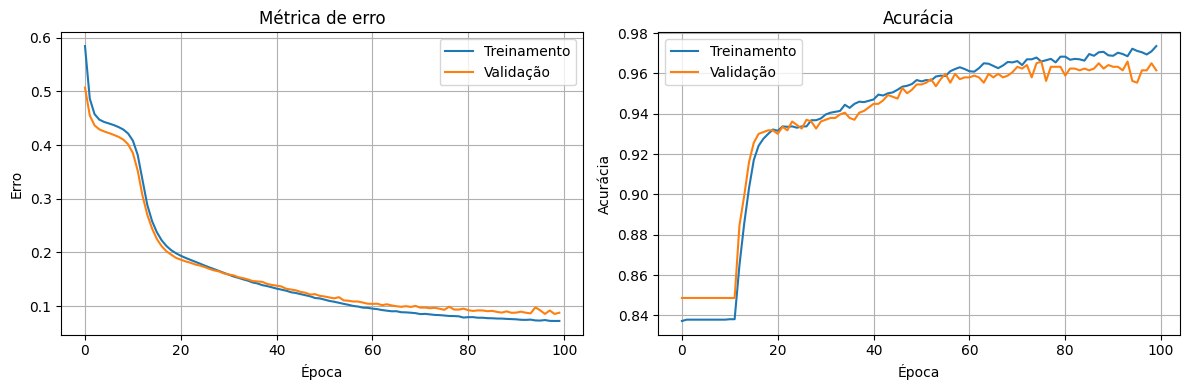

--> E_val - E_in = 0.0189
--> Acurácia (treino): 0.9722
--> Acurácia (validação): 0.9615
--> acc_train - acc_val = 0.0107


In [219]:
print("TREINAMENTO COM VALIDAÇÃO")
print()

# Dividindo treino em treino/validação
X_train_val, X_val_val, y_train_val, y_val_val = model_selection.train_test_split(
    X, y_keras, random_state=RANDOM_STATE, test_size=0.2
)

# Recriando o modelo
model_val = Sequential()
model_val.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
model_val.add(Dense(10, kernel_initializer='normal', activation='relu'))
model_val.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.01)
model_val.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Treinamento com validação
history_val = model_val.fit(
    X_train_val, y_train_val, 
    validation_data=(X_val_val, y_val_val), 
    epochs=100, 
    batch_size=BATCH_SIZE
)

# Plot das curvas de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_val.history['loss'])
plt.plot(history_val.history['val_loss'])
plt.title('Métrica de erro')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_val.history['accuracy'])
plt.plot(history_val.history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtendo métricas
E_in_val, acc_train_val = model_val.evaluate(X_train_val, y_train_val, batch_size=BATCH_SIZE, verbose=0)
E_val_val, acc_val_val = model_val.evaluate(X_val_val, y_val_val, batch_size=BATCH_SIZE, verbose=0)

print(f"--> E_val - E_in = {E_val_val - E_in_val:.4f}")
print(f'--> Acurácia (treino): {acc_train_val:.4f}')
print(f'--> Acurácia (validação): {acc_val_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train_val - acc_val_val:.4f}")

K-FOLD CROSS VALIDATION

Executando K-Fold Cross Validation com 5 folds...

--- FOLD 1 ---
Treino fold: 4327, Validação fold: 1082


c:\Users\janay\Analise-de-dados-do-setor-financeiro-do-municipio-de-Teixeira-PB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


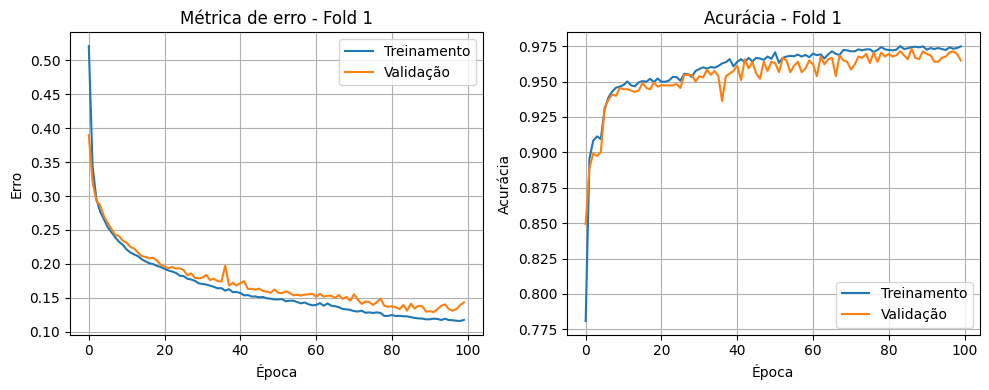

--> Acurácia (treino): 0.9716
--> Acurácia (validação): 0.9649
--> E_val - E_in = 0.0238
--> acc_train - acc_val = 0.0067

--- FOLD 2 ---
Treino fold: 4327, Validação fold: 1082


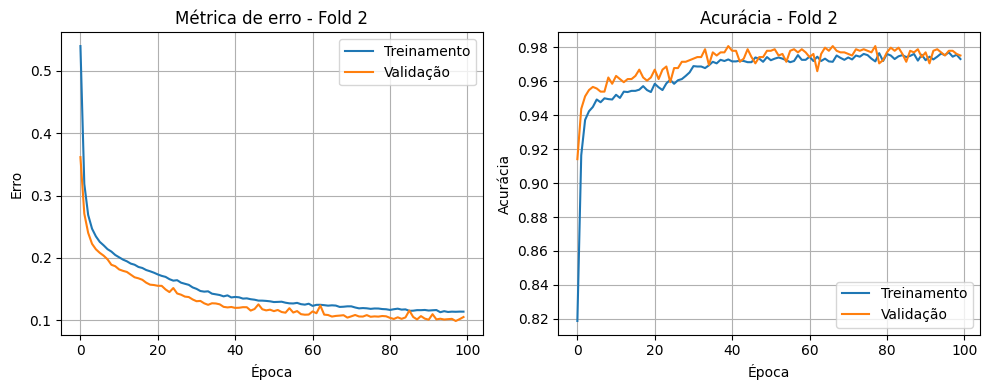

--> Acurácia (treino): 0.9780
--> Acurácia (validação): 0.9750
--> E_val - E_in = -0.0080
--> acc_train - acc_val = 0.0030

--- FOLD 3 ---
Treino fold: 4327, Validação fold: 1082


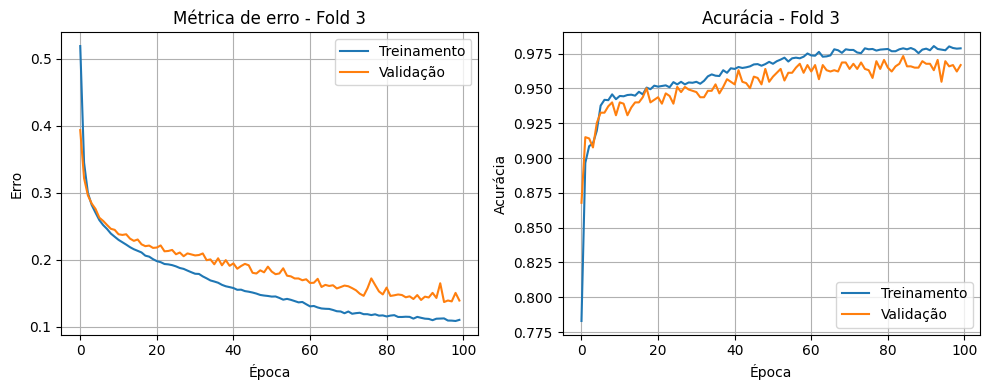

--> Acurácia (treino): 0.9797
--> Acurácia (validação): 0.9667
--> E_val - E_in = 0.0352
--> acc_train - acc_val = 0.0129

--- FOLD 4 ---
Treino fold: 4327, Validação fold: 1082


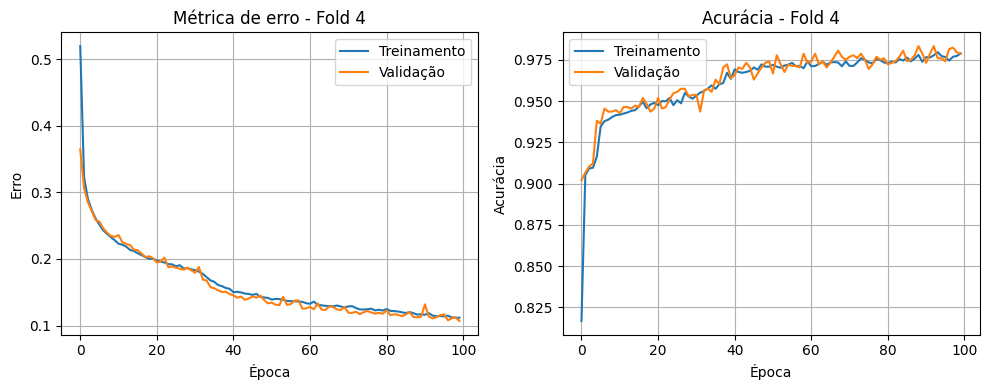

--> Acurácia (treino): 0.9810
--> Acurácia (validação): 0.9787
--> E_val - E_in = -0.0012
--> acc_train - acc_val = 0.0023

--- FOLD 5 ---
Treino fold: 4328, Validação fold: 1081


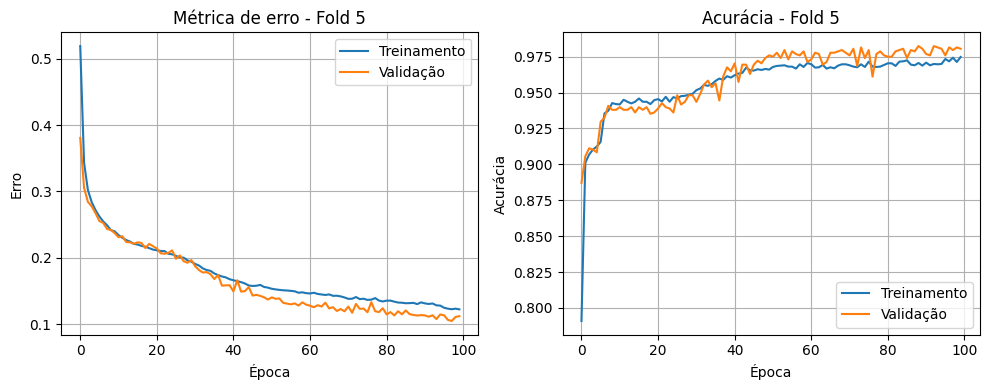

--> Acurácia (treino): 0.9790
--> Acurácia (validação): 0.9806
--> E_val - E_in = -0.0068
--> acc_train - acc_val = -0.0016

RESULTADOS MÉDIOS DOS FOLDS:
--> Acurácia média (treino): 0.9779
--> Acurácia média (validação): 0.9732
--> E_val - E_in médio = 0.0086
--> acc_train - acc_val médio = 0.0047


In [220]:
print("K-FOLD CROSS VALIDATION")
print()

# Usando todo o conjunto de treinamento original
X_full = X_balanceado_train_scaled
y_full = np.where(y_balanceado_train == -1, 0, 1)

# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []

print("Executando K-Fold Cross Validation com 5 folds...")

# Realiza o k-fold cross validation
i = 0
for train_index, val_index in skf.split(X_full, y_full):
    i = i + 1
    print(f"\n--- FOLD {i} ---")
    
    X_train_fold, X_val_fold = X_full[train_index], X_full[val_index]
    y_train_fold, y_val_fold = y_full[train_index], y_full[val_index]
    
    print(f"Treino fold: {len(X_train_fold)}, Validação fold: {len(X_val_fold)}")
    
    # Criando a arquitetura da rede neural
    # Usando a arquitetura: 11 → 20 → 10 → 1 (que tu definiu na outra)
    model_fold = Sequential()
    model_fold.add(Dense(20, input_dim=11, kernel_initializer='normal', 
                         kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model_fold.add(Dense(10, kernel_initializer='normal', 
                         kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model_fold.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compilar o modelo - usando Adam como no exemplo de Bruno, no sigaa
    model_fold.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
  
    # Treina o modelo
    history = model_fold.fit(X_train_fold, y_train_fold, 
                            validation_data=(X_val_fold, y_val_fold), 
                            epochs=100, batch_size=BATCH_SIZE, verbose=0)
    history_list.append(history) 
    
    # Avalia o modelo
    E_in, accuracy_train = model_fold.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model_fold.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)    
    
    # Exibe o histórico de treinamento para um fold específico
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Métrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'])
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Acurácia - Fold {i}')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f'--> Acurácia (treino): {accuracy_train:.4f}')
    print(f'--> Acurácia (validação): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_train - acc_val = {accuracy_train - accuracy_val:.4f}")

# Calcula as métricas médias
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

print(f"\n" + "="*50)
print("RESULTADOS MÉDIOS DOS FOLDS:")
print("="*50)
print(f'--> Acurácia média (treino): {avg_accuracy_train:.4f}')
print(f'--> Acurácia média (validação): {avg_accuracy_val:.4f}')
print(f"--> E_val - E_in médio = {avg_eval - avg_ein:.4f}")
print(f"--> acc_train - acc_val médio = {avg_accuracy_train - avg_accuracy_val:.4f}")

ANÁLISE DO HISTÓRICO MÉDIO

Épocas para média: 100


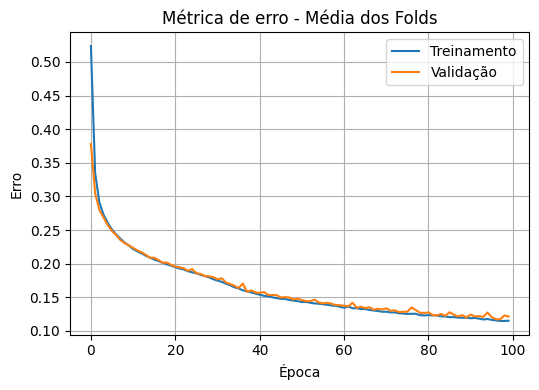


RESUMO FINAL DA REDE NEURAL KERAS:
  Arquitetura: 11 → 20 → 10 → 1 (461 parâmetros)
  Treino simples: 0.9608 acurácia
  Com validação: 0.9615 acurácia
  K-Fold médio: 0.9732 ± 0.0063 acurácia
  Diferença E_val - E_in: 0.0086


In [221]:
print("ANÁLISE DO HISTÓRICO MÉDIO")
print()

# Histórico com valores médios dos folds
history_loss_avg = []
history_val_loss_avg = []
history_acc_avg = []
history_val_acc_avg = []

# Calculando médias por época
max_epochs = min(len(h.history['loss']) for h in history_list)
print(f"Épocas para média: {max_epochs}")

for epoch in range(max_epochs):
    epoch_train_losses = []
    epoch_val_losses = []
    epoch_train_accs = []
    epoch_val_accs = []
    
    for history in history_list:
        epoch_train_losses.append(history.history['loss'][epoch])
        epoch_val_losses.append(history.history['val_loss'][epoch])
        epoch_train_accs.append(history.history['accuracy'][epoch])
        epoch_val_accs.append(history.history['val_accuracy'][epoch])
    
    history_loss_avg.append(np.mean(epoch_train_losses))
    history_val_loss_avg.append(np.mean(epoch_val_losses))
    history_acc_avg.append(np.mean(epoch_train_accs))
    history_val_acc_avg.append(np.mean(epoch_val_accs))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Métrica de erro - Média dos Folds')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nRESUMO FINAL DA REDE NEURAL KERAS:")
print(f"  Arquitetura: 11 → 20 → 10 → 1 ({11*20 + 20 + 20*10 + 10 + 10*1 + 1} parâmetros)")
print(f"  Treino simples: {acc_test:.4f} acurácia")
print(f"  Com validação: {acc_val_val:.4f} acurácia") 
print(f"  K-Fold médio: {avg_accuracy_val:.4f} ± {np.std(accuracies_val):.4f} acurácia")
print(f"  Diferença E_val - E_in: {avg_eval - avg_ein:.4f}")

# Salvando variáveis para uso posterior
keras_final_accuracy = avg_accuracy_val
keras_final_loss = avg_eval
keras_std_accuracy = np.std(accuracies_val)

In [222]:
print("Preparando dados para avaliação final...")

y_train_keras = (y_balanceado_train == 1).astype(int)
y_test_keras = (y_balanceado_test == 1).astype(int)

print(f"Dados preparados:")
print(f"  X_train: {X_balanceado_train_scaled.shape}")
print(f"  y_train: {y_train_keras.shape}")
print(f"  X_test: {X_balanceado_test_scaled.shape}")
print(f"  y_test: {y_test_keras.shape}")

# Treinando o modelo final com melhor configuração (K-fold Adam)
print("\nTreinando modelo final com configuração otimizada...")

final_model = Sequential()
final_model.add(Dense(20, input_dim=11, kernel_initializer='normal', 
                     kernel_regularizer=regularizers.l2(0.01), activation='relu'))
final_model.add(Dense(10, kernel_initializer='normal', 
                     kernel_regularizer=regularizers.l2(0.01), activation='relu'))
final_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

final_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

final_model.fit(X_balanceado_train_scaled, y_train_keras, 
               epochs=100, batch_size=BATCH_SIZE, verbose=0)

test_loss, test_accuracy = final_model.evaluate(X_balanceado_test_scaled, y_test_keras, 
                                               batch_size=BATCH_SIZE, verbose=0)

print(f"\n RESULTADO FINAL DA REDE NEURAL KERAS:")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")

y_test_pred_keras = final_model.predict(X_balanceado_test_scaled)
y_test_pred_keras_binary = (y_test_pred_keras > 0.5).astype(int).flatten()

from sklearn.metrics import precision_score, recall_score, f1_score

test_precision = precision_score(y_test_keras, y_test_pred_keras_binary)
test_recall = recall_score(y_test_keras, y_test_pred_keras_binary)
test_f1 = f1_score(y_test_keras, y_test_pred_keras_binary)

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")

keras_test_accuracy = test_accuracy
keras_test_precision = test_precision
keras_test_recall = test_recall
keras_test_f1 = test_f1


Preparando dados para avaliação final...
Dados preparados:
  X_train: (5409, 11)
  y_train: (5409,)
  X_test: (2319, 11)
  y_test: (2319,)

Treinando modelo final com configuração otimizada...


c:\Users\janay\Analise-de-dados-do-setor-financeiro-do-municipio-de-Teixeira-PB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 RESULTADO FINAL DA REDE NEURAL KERAS:
   Acurácia no conjunto de TESTE: 0.9759
   Loss no conjunto de teste: 0.1083
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   Precisão: 0.9781
   Recall: 0.9911
   F1-Score: 0.9845
   Precisão: 0.9781
   Recall: 0.9911
   F1-Score: 0.9845


## RESUMO FINAL 

In [ ]:
# RESUMO COMPARATIVO FINAL - MODELOS IMPLEMENTADOS
print("=" * 80)
print("RESUMO FINAL DOS TRÊS MODELOS")
print("=" * 80)

print(f"DATASET: {len(X_balanceado):,} registros financeiros de Teixeira-PB (balanceados)")
print(f"   • Normal (1): {sum(y_balanceado==1):,} casos ({(sum(y_balanceado==1)/len(y_balanceado)*100):.1f}%)")
print(f"   • Anomalia (-1): {sum(y_balanceado==-1):,} casos ({(sum(y_balanceado==-1)/len(y_balanceado)*100):.1f}%)")
print(f"   • Features: {X_balanceado.shape[1]} variáveis numéricas")
print(f"   • Divisão: 70% treino ({len(X_balanceado_train):,}) + 30% teste ({len(X_balanceado_test):,})")
print()

print("COMPARATIVO DE PERFORMANCE NO CONJUNTO DE TESTE:")
print("-" * 80)
print(f"{'MODELO':<20} {'ACURÁCIA':<10} {'F1-SCORE':<10} {'PRECISÃO':<10} {'RECALL':<10}")
print("-" * 70)

try:
    print(f"{'Decision Tree':<20} {test_acc_dt:.4f}     {test_f1_dt:.4f}     "
          f"{test_precision_dt:.4f}     {test_recall_dt:.4f}")
    dt_available = True
except NameError:
    print(f"{'Decision Tree':<20} {'N/A':<10} {'N/A':<10} {'N/A':<10} {'N/A':<10}")
    dt_available = False

try:
    print(f"{'SVM':<20} {test_acc_svm:.4f}     {test_f1_svm:.4f}     "
          f"{test_precision_svm:.4f}     {test_recall_svm:.4f}")
    svm_available = True
except NameError:
    print(f"{'SVM':<20} {'N/A':<10} {'N/A':<10} {'N/A':<10} {'N/A':<10}")
    svm_available = False

print(f"{'Rede Neural Keras':<20} {keras_test_accuracy:.4f}     {keras_test_f1:.4f}     "
      f"{keras_test_precision:.4f}     {keras_test_recall:.4f}")

print()

print("CLASSIFICAÇÃO DOS MODELOS:")

resultados_completos = []

tn_keras, fp_keras, fn_keras, tp_keras = cm_keras.ravel()
taxa_deteccao_anomalias_keras = tn_keras / (tn_keras + fp_keras) if (tn_keras + fp_keras) > 0 else 0
resultados_completos.append(("Rede Neural", keras_test_accuracy, taxa_deteccao_anomalias_keras))

if svm_available:
    try:
        tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
        taxa_deteccao_anomalias_svm = tn_svm / (tn_svm + fp_svm) if (tn_svm + fp_svm) > 0 else 0
        resultados_completos.append(("SVM", test_acc_svm, taxa_deteccao_anomalias_svm))
    except NameError:
        pass

if dt_available:
    try:
        tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
        taxa_deteccao_anomalias_dt = tn_dt / (tn_dt + fp_dt) if (tn_dt + fp_dt) > 0 else 0
        resultados_completos.append(("Árvore de Decisão", test_acc_dt, taxa_deteccao_anomalias_dt))
    except NameError:
        pass

resultados_completos.sort(key=lambda x: x[1], reverse=True)

print(" RANKING CORRETO (Detecção de Anomalias Financeiras):")
for i, (modelo, acc, deteccao_anomalias) in enumerate(resultados_completos, 1):
    print(f"   {i}º {modelo}: {acc:.2%} acurácia geral, {deteccao_anomalias:.2%} detecção de anomalias")


print()

RESUMO FINAL DOS TRÊS MODELOS
DATASET: 7,728 registros financeiros de Teixeira-PB (balanceados)
   • Normal (1): 6,000 casos (77.6%)
   • Anomalia (-1): 1,728 casos (22.4%)
   • Features: 11 variáveis numéricas
   • Divisão: 70% treino (5,409) + 30% teste (2,319)

COMPARATIVO DE PERFORMANCE NO CONJUNTO DE TESTE:
--------------------------------------------------------------------------------
MODELO               ACURÁCIA   F1-SCORE   PRECISÃO   RECALL    
----------------------------------------------------------------------
Decision Tree        0.9664     0.9660     0.9659     0.9664
SVM                  0.9685     0.9684     0.9684     0.9685
Rede Neural Keras    0.9759     0.9845     0.9781     0.9911

CLASSIFICAÇÃO DOS MODELOS:
 RANKING CORRETO (Detecção de Anomalias Financeiras):
   1º Rede Neural: 97.59% acurácia geral, 94.80% detecção de anomalias
   2º SVM: 96.85% acurácia geral, 89.52% detecção de anomalias
   3º Árvore de Decisão: 96.64% acurácia geral, 86.46% detecção de ano